# Linear Models

<div class="alert alert-success">
Linear (regression) modelling is a method of predicting the value of an output value as a linear combination of weight input values.
</div>

### Linear Models - Overview

In the simplest case, we are trying to fit a line, so our model is of the form:

$$ y = ax + b $$

In this equation above, we are trying to predict some data variable $y$, from some other data variable $x$, where $a$ and $b$ are parameters we need to figure out, by fitting the model, and reflect the slope, and y-intercept, of the model (line) respectively. 

We need some procedure to go about finding $a$ and $b$. We will use OLS to do so - the values of $a$ and $b$ we want are those that fulfill the OLS solution - meaning the values that lead to the smallest distance between the predictions of the model, and our data. 

Note that you need data in which you know both $x$ and $y$ already to do so - to train your model).

This approach can also be generalized, including, for example, more features used to predict our output of interest. 

Therefore, we will rewrite our model, in the general form, as:

$$ y = a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n + \epsilon $$

In the equation above $a_0$ is the intercept (the same as $b$ from above), and $a_1$ to $a_n$ are $n$ parameters that we are trying to learn, as weights for data features $x_1$ to $x_n$. Our output variable (what we are trying to predict) is still $y$, and we've introduced $\epsilon$, which is the error, which basically captures unexplained variance.

### Linear Models Pratice

In the following, we will generate some data, with two features 'D1' and 'D2', that are correlated. 

Given the correlation, we can try and predict values of 'D2' from 'D1', and we will create a linear model to do so. 

This model, using the second notation from above, will be of the form:

$$ D2 = a_0 + a_1 * D1 $$

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Statmodels & patsy
import patsy
import statsmodels.api as sm

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
# Generate some correlated data

# Settings
corr = 0.75
covs = [[1, corr], [corr, 1]]
means = [0, 0]

# Generate the data
dat = np.random.multivariate_normal(means, covs, 1000)

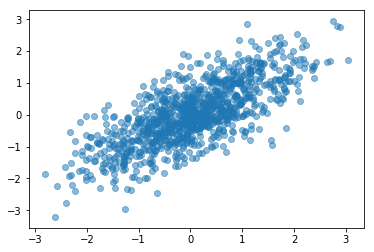

In [9]:
# Check out the data we generated
plt.scatter(dat[:, 0], dat[:, 1], alpha=0.5);
#plt.scatter(dat[:, 0], dat[:, 1], alpha=0.5);

In [10]:
# Put data into a DataFrame
df = pd.DataFrame(dat, columns=['D1', 'D2'])

In [11]:
# Eye ball the data
df.head()

,D1,D2
0,0.944473,2.351525
1,-0.212330,0.199969
2,-0.492862,-0.806606
3,0.960859,1.698901
4,-0.164583,-1.290526


In [12]:
# Check the correlation between D1 & D2 (that it matches what was synthesized)
df.corr()

,D1,D2
D1,1.000000,0.741379
D2,0.741379,1.000000


## Linear Models with Statsmodels & Patsy

<div class="alert alert-success">
Statsmodels is a module for statistical analyses in Python. Patsy is a useful package to work with and describe statistical models.
</div>

<div class="alert alert-info">
The official documentation for
<a href=http://www.statsmodels.org/stable/index.html>statsmodels</a>
and
<a href=https://patsy.readthedocs.io/en/latest/>patsy</a>.
</div>

In [13]:
# Patsy gives us an easy way to construct design matrices
#  For our purpose, 'design matrices' are just organized matrices of our predictor and output variables
outcome, predictors = patsy.dmatrices('D2 ~ D1', df)

If you check the type of 'outcome' and 'predictors', you will find they are custom patsy objects, of type 'DesignMatrix'.

If you print them out, you will see that they reseble pandas Series or DataFrames. 

You can think of them as customized dataframe-like objects for the specific purpose of being organized into matrices to be used for modelling.

In [18]:
# Now use statsmodels to intialize an OLS linear model
#  This step initializes the model, and provides the data (but does not actually compute the model)
mod = sm.OLS(outcome, predictors)

Note that statsmodels, just like scikit-learn that we will encounter a bit later, uses an object-oriented approach. 

In this approach you initialize complex objects that store the data and methods together, giving you an organized way to store and check data and parameters, to fit models, and then even to use them to make predictions and so on.

In [19]:
# Check the type of the model object we just created.
#  You can also explore, with tab-complete, what is availabe from this object
type(mod)

statsmodels.regression.linear_model.OLS

In [20]:
# Finally, fit the model
res = mod.fit()

In [21]:
# Check out the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     D2   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1218.
Date:                Wed, 21 Feb 2018   Prob (F-statistic):          4.54e-175
Time:                        15:12:12   Log-Likelihood:                -987.16
No. Observations:                1000   AIC:                             1978.
Df Residuals:                     998   BIC:                             1988.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0037      0.021      0.180      0.8

### Interpreting Outputs

Statsmodels gives us a lot of information!

The top section is largely meta-data: it includes things like the model type, and time and date of us running it. 

It also includes the R-squared, which is an overall summary of the amount of variance the model is able to capture. This value ranges from 0-1, and ~0.5, that we see here, is quite a high value, suggesting a good model fit. 

The middle column is the actual model results. 

Each row reflects a parameter, and gives us it's value (`coef`), the error (`std err`), the results of a statistical test regarding whether this parameter is a significant predictor of the output variable (`t`, which associated p-value as `P>|t|`), and the confidence interval of the parameters value (`[0.025` - `0.975]`).

The last model includes some other tests that are run on the data, that can help you check some descriptors of the input data, and also that they meet the required criteria of such a model fit. 

### Checking our Model

In terms of the model itself, the most useful components are in the second row, in which the summary gives the parameter values, and p-values of our predictors, which in this case are 'Intercept', and 'D2'. 

From the results above, we can grab the values of the parameters, and obtain the following model:

$$ D2 = -0.0284 + 0.7246 * D1 $$

However, we should also keep in mind the statistical test that is reported, a test of whether the parameter value is significant (significantly different from zero). Using an alpha value of 0.05, in this case, the 'D2' parameter value is significant, but the 'Intercept' value is not. Since the parameter value for 'Intercept' is not significantly different from zero, we can decide not to include it in our final model. 

We therefore finish with the model:
$$ D2 = 0.7246 * D1 $$

With this model, it is promising that are value of $a_1$, of 0.7246, is very close to the correlation value of the data points, which we set at 0.75! 

In [ ]:
## Plot the model fit line

# Plot the orginal data (as before)
plt.scatter(df['D1'], df['D2'], alpha=0.3, label='Data');

# Generate and plot the model fit line
xs = np.arange(df['D1'].min(), df['D1'].max())
ys = 0.7246 * xs
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('D1')
plt.xlabel('D2')
plt.legend();

### Using multiple predictors

The model above used only one predictor, fitting a simple straight line, and as such actually mimics previous approaches we've taken to fitting lines. 

We can also fit more than 1 predictor variable, and that is where the power of patsy and statsmodels really comes through, as these functions will fit more complex models, including as many parameters as we want, also dealing with some aspects of correlated features, and so on. 

Here, we will add a new variable to our dataframe, and fit an OLS model with two predictors. 

In [22]:
# Add a new column of data to df
df['D3'] = pd.Series(np.random.randn(1000), index=df.index)
df.head()

,D1,D2,D3
0,0.944473,2.351525,-0.571094
1,-0.212330,0.199969,-0.844938
2,-0.492862,-0.806606,-0.625213
3,0.960859,1.698901,1.461821
4,-0.164583,-1.290526,-1.237238


In [23]:
# Predict D1 from D2 and D3
outcome, predictors = patsy.dmatrices('D1 ~ D2 + D3', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

In [24]:
# Check the model fit summary
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     D1   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     608.4
Date:                Wed, 21 Feb 2018   Prob (F-statistic):          1.98e-173
Time:                        15:15:56   Log-Likelihood:                -1028.3
No. Observations:                1000   AIC:                             2063.
Df Residuals:                     997   BIC:                             2077.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0116      0.021      0.542      0.5

Note that statsmodels, as used above, is a powerful, general OLS model approach. 

You can further investigate how to include other features, such as interactions between input variables, and so on. 

## Linear Regression with sklearn

Scikit-learn also has implementations of Linear Regression models. 

Here we will quickly demonstrate running the same linear OLS model fits as above, using sklearn instead of statsmodels. 

<div class="alert alert-info">
Linear regression in 
<a href=http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>sklearn</a>.
</div>

In [25]:
# Linear Models with sklearn
from sklearn import linear_model

In [26]:
# Convert data into shape for easier use with sklearn
d1 = np.reshape(df.D1.values, [len(df.D1), 1])
d2 = np.reshape(df.D2.values, [len(df.D2), 1])
d3 = np.reshape(df.D3.values, [len(df.D3), 1])

In [27]:
type(d1)

numpy.ndarray

In [28]:
# Initialize linear regression model
reg = linear_model.LinearRegression()

In [ ]:
reg.

In [29]:
# Fit the linear regression model
reg.fit(d2, d1) #d1 = a0 + a1*d2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Check the results of this
#  If you compare these to what we got with statsmodels above, they are indeed the same
print(reg.intercept_[0])
print(reg.coef_[0][0])

0.011564341037993999
0.7725183548995266


### Using multiple predictors (in sklearn)

In [32]:
# Initialize and fit linear model
# d1 = a1*d2 + a2*d3 + a0
reg = linear_model.LinearRegression()
reg.fit(np.hstack([d2, d3]), d1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
np.hstack([d2, d3]).shape

(1000, 2)

In [ ]:
# Check the results of this
#  If you compare these to what we got with statsmodels above, they are indeed the same
print('Intercept: \t', reg.intercept_[0])
print('Theta D2 :\t', reg.coef_[0][0])
print('Theta D3 :\t', reg.coef_[0][1])